In [35]:
import tensorflow as tf
from pathlib import Path
import pandas as pd
import numpy as np
import pickle as pkl
import os
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

import networks
import metrics
import evaluate
from datasets import seq2seq_generator, seq2seq_generator_with_aug

%matplotlib inline

In [32]:
# Load data
with open('../data/yearly_24_train.pkl', 'rb') as f:
    data = pkl.load(f)

# Generate synthetic samples
s1 = np.random.choice(np.arange(len(data[0])), 300000, replace=True)
s2 = np.random.choice(np.arange(len(data[0])), 300000, replace=True)
s3 = np.random.choice(np.arange(len(data[0])), 300000, replace=True)
s4 = np.random.choice(np.arange(len(data[0])), 300000, replace=True)
s5 = np.random.choice(np.arange(len(data[0])), 300000, replace=True)

syn3 = [(d[s1] + d[s2] + d[s3]) / 3 for d in data]
syn4 = [(d[s1] + d[s2] + d[s3] + d[s4] ) / 4 for d in data]
syn5 = [(d[s1] + d[s2] + d[s3] + d[s4] + d[s5]) / 5 for d in data]

with open('/tmp/yearly_24_train_aug_3.pkl', 'wb') as f:
    pkl.dump(syn3, f)
    
with open('/tmp/yearly_24_train_aug_4.pkl', 'wb') as f:
    pkl.dump(syn4, f)
    
with open('/tmp/yearly_24_train_aug_5.pkl', 'wb') as f:
    pkl.dump(syn5, f)

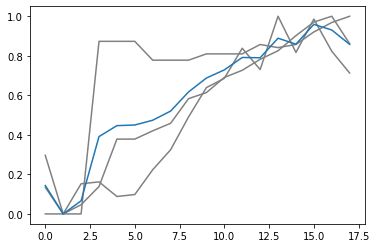

In [41]:
plt.plot(data[0][s1[0]], c='0.5')
plt.plot(data[0][s2[0]], c='0.5')
plt.plot(data[0][s3[0]], c='0.5')

plt.plot(syn3[0][0])

In [9]:
test_set = seq2seq_generator('../data/yearly_24_validation.pkl', overlap=8, augmentation=0)

In [10]:
reconstruction_loss = metrics.build_reconstruction_loss(overlap=8)

metric_functions = ['mse', 'mae', reconstruction_loss]

hparams = {
    'input_seq_length': 18,
    'output_seq_length': 14,
    'bottleneck_size': 700,
    'bottleneck_activation': 'relu',
    'loss_function': 'mae',
}

model = networks.convolutional_ae_4_layer(hparams, metric_functions)

In [19]:
def train(n):
    
    directory = '../experimental/results/custom_aug_multiple_{}'.format(n)
    if not os.path.isdir(directory):
        os.mkdir(directory)
        
    
    for e in range(10):

        train_set = seq2seq_generator_with_aug('../data/yearly_24_train.pkl',
                                               '/tmp/yearly_24_train_aug_{}.pkl'.format(n),
                                               overlap=8)

        callbacks = [tf.keras.callbacks.ModelCheckpoint(directory + '/best_weights_{}.h5'.format(e), 
                                                        save_best_only=True)]

        model.fit(train_set, epochs=1, steps_per_epoch=len(train_set)//256+1,
                      validation_steps=len(test_set)//256+1, validation_data=test_set,
                      callbacks=callbacks)

        tf.keras.backend.clear_session()

In [20]:
train(3)

Train for 690 steps, validate for 230 steps
690/690 [==============================] - 49s 71ms/step - loss: 193.7818 - mse: 20040290304.0000 - mae: 193.7819 - reconstruction_loss: 4.6560e-04 - val_loss: 0.3658 - val_mse: 1259.2687 - val_mae: 0.3658 - val_reconstruction_loss: 2.9554e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 48s 70ms/step - loss: 193.7792 - mse: 20040290304.0000 - mae: 193.7792 - reconstruction_loss: 3.2797e-04 - val_loss: 0.3717 - val_mse: 1259.2573 - val_mae: 0.3717 - val_reconstruction_loss: 7.0707e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 53s 76ms/step - loss: 193.7783 - mse: 20040290304.0000 - mae: 193.7782 - reconstruction_loss: 2.9917e-04 - val_loss: 0.3681 - val_mse: 1259.2560 - val_mae: 0.3681 - val_reconstruction_loss: 4.5954e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 53s 77ms/step - loss: 193.7767 - mse: 20040290304

In [21]:
train(4)

Train for 690 steps, validate for 230 steps
690/690 [==============================] - 51s 73ms/step - loss: 193.7707 - mse: 20040290304.0000 - mae: 193.7707 - reconstruction_loss: 1.4532e-04 - val_loss: 0.3607 - val_mse: 1259.2644 - val_mae: 0.3607 - val_reconstruction_loss: 1.2830e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 53s 77ms/step - loss: 193.7699 - mse: 20040290304.0000 - mae: 193.7699 - reconstruction_loss: 1.3695e-04 - val_loss: 0.3604 - val_mse: 1259.2605 - val_mae: 0.3604 - val_reconstruction_loss: 1.1996e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 50s 72ms/step - loss: 193.7693 - mse: 20040290304.0000 - mae: 193.7693 - reconstruction_loss: 1.4300e-04 - val_loss: 0.3601 - val_mse: 1259.2659 - val_mae: 0.3601 - val_reconstruction_loss: 1.1627e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 53s 76ms/step - loss: 193.7684 - mse: 20040290304

In [22]:
train(5)

Train for 690 steps, validate for 230 steps
690/690 [==============================] - 48s 69ms/step - loss: 193.7629 - mse: 20040290304.0000 - mae: 193.7628 - reconstruction_loss: 1.2063e-04 - val_loss: 0.3608 - val_mse: 1259.2555 - val_mae: 0.3608 - val_reconstruction_loss: 1.2805e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 48s 70ms/step - loss: 193.7621 - mse: 20040290304.0000 - mae: 193.7619 - reconstruction_loss: 1.2017e-04 - val_loss: 0.3613 - val_mse: 1259.2601 - val_mae: 0.3613 - val_reconstruction_loss: 1.0861e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 53s 76ms/step - loss: 193.7613 - mse: 20040292352.0000 - mae: 193.7612 - reconstruction_loss: 1.1658e-04 - val_loss: 0.3613 - val_mse: 1259.2623 - val_mae: 0.3613 - val_reconstruction_loss: 1.1771e-04
Train for 690 steps, validate for 230 steps
690/690 [==============================] - 53s 76ms/step - loss: 193.7605 - mse: 20040292352

## Evaluation

In [23]:
# Read test data
train_path = Path('../data/Yearly-train.csv')
test_path = Path('../data/Yearly-test.csv')

train = pd.read_csv(train_path).drop('V1', axis=1)
test = pd.read_csv(test_path).drop('V1', axis=1)

X_test = np.array([evaluate.get_last_N(ser[1], N=18) for ser in train.iterrows()])
y_test = test.values

In [24]:
def evaluate_num(n):

    all_preds = []

    for i in range(10):

        model_dir = '../experimental/results/custom_aug_multiple_{}/best_weights_{}.h5'.format(n, i)

        model = tf.keras.models.load_model(model_dir, custom_objects={'reconstruction_loss': reconstruction_loss})

        preds = evaluate.get_predictions(model, X_test)

        all_preds.append(preds)

    for p in all_preds:
        print(np.nanmean(metrics.SMAPE(y_test, p[:, -6:])))

    ensemble_preds = np.median(np.array(all_preds), axis=0)
    print(np.nanmean(metrics.SMAPE(y_test, ensemble_preds[:, -6:])))

In [25]:
evaluate_num(3)

13.105370637938266
13.19854823495386
13.134957823524998
13.275388879083511
13.10069422447199
13.238134087826799
13.157405726882695
13.385256605638409
13.308470725790794
13.442074949826164
13.08277797278894


In [26]:
evaluate_num(4)

13.531313380269564
13.68263199327988
13.449568120873776
13.740135635266713
13.605844032592682
13.957055777474514
13.833375789543323
13.713942790941166
13.73998556363741
13.915554726334973
13.485571895792553


In [27]:
evaluate_num(5)

14.000710092227395
14.238483278844807
13.962905221325062
14.000759641486974
14.238738834375713
14.034848992149062
14.364995050275182
14.409737872277569
14.25473967555718
14.303204423717654
13.922511216936844
